# Problem 1: 
# Descriptive Statistics and Probability Theory: Real Data on CEO Compensation

## 1.1 In the pre-reading you/we have discussed tools and methods for visualizing data and
computing some simple characteristic measures. Our aim here is to apply all the basic
techniques and to draw correct conclusions. The file ceo.xls contains data on the
CEO compensations and additional variables listed below.

*salary = 1999 salary + bonuses in 1000 US$   
totcomp = 1999 CEO total compensation   
tenure = # of years as CEO (=0 if less than 6 months)   
age = age of CEO   
sales = total 1998 sales revenue of firm i   
profits = 1998 profits for firm i   
assets = total assets of firm i in 1998*

In [496]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

cols_to_use = ["salary", "totcomp", "tenure", "age", "sales", "profits", "assets"] 
xl = pd.ExcelFile("ceo.xls")

df = xl.parse("ceo", usecols= cols_to_use)

df.head(20)

,salary,totcomp,tenure,age,sales,profits,assets
0,3030,8138,7,61,161315.0,2956.0,257389.0
1,6050,14530,0,51,144416.0,22071.0,237545.0
2,3571,7433,11,63,139208.0,4430.0,49271.0
3,3300,13464,6,60,100697.0,6370.0,92630.0
4,10000,68285,18,63,100469.0,9296.0,355935.0
5,9375,42381,6,57,81667.0,6328.0,86100.0
6,9525,12165,15,60,76431.0,5807.0,668641.0
7,5000,24424,5,61,57813.0,5372.0,59920.0
8,999,2916,3,57,56154.0,1120.0,36672.0
9,3300,7467,2,60,53588.0,6398.0,59550.0


------------------------------------------------
1.1(a)

In [497]:
df["salary"].describe()

count      447.000000
mean      2027.516779
std       1722.566389
min        100.000000
25%       1084.000000
50%       1600.000000
75%       2347.500000
max      15250.000000
Name: salary, dtype: float64

In [498]:
stats.trim_mean(df["salary"], 0.1)

1710.091922005571

* **2027.52** Mean represent average salary 
* **1710.1** Trimmed mean represent average salary, without 10% of largest and smallest salaries
* **2347** upper quartile splits off the highest 25% of salaries from the lowest 75%
* **1084** lower quartile splits off the lowest 25% of salaries from the highest 75%

---
1.1(b)

i

5.5555555555555545

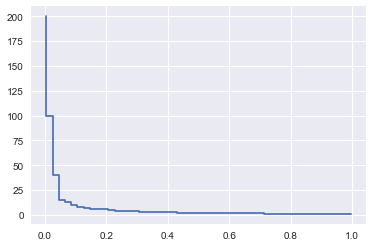

In [499]:
from statsmodels.distributions.empirical_distribution import ECDF
import random

sample = np.random.uniform(0, 1, 200)
ecdf = ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = 1/ecdf(x)
plt.step(x, y)

1/ecdf(0.2)

In [500]:
1/ecdf(0.8)

1.3157894736842106

---
ii 

22.4 % of salaries are equal to or less than 1000   
5.4 % of salaries are more than or equal to 5000

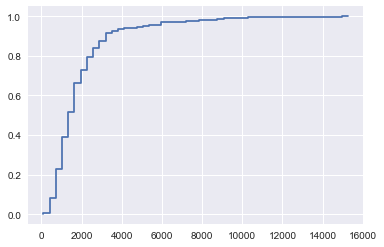

In [501]:
sample = df["salary"]
ecdf = ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)

In [502]:
ecdf(1000)*100

22.371364653243848

In [503]:
(1-ecdf(5000))*100

5.3691275167785264

------------------------------------------------
1.1(c)

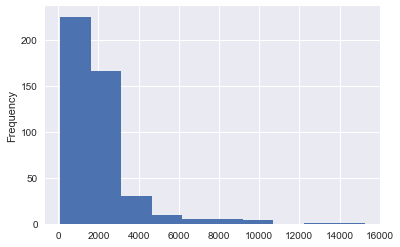

In [504]:
df["salary"].plot.hist()

We can conclude that significant part of salaries less than 2000$.

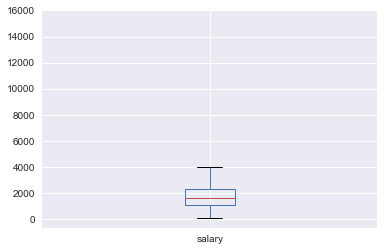

In [505]:
df.boxplot("salary")

We can conclude that salaries more than 4000$ can be considered as rare. And that 50 percent of salaries lie near between 1000 and 2300.

------------------------------------------------
1.1(d) 
* Rough histograms gives us good overall picture of distribution. 
* Details histograms gives us more information but large number of bars can be redundant.

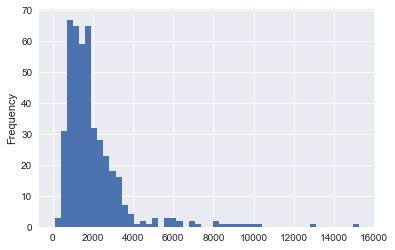

In [506]:
df["salary"].plot.hist(bins=50)

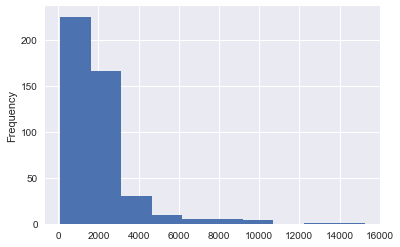

In [507]:
df["salary"].plot.hist()

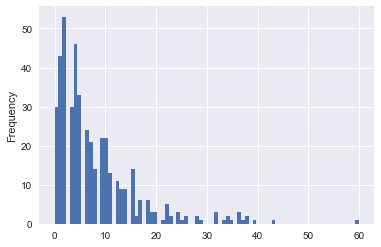

In [508]:
df["tenure"].plot.hist(bins=80)

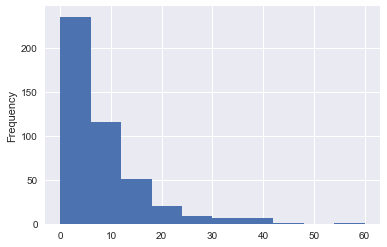

In [509]:
df["tenure"].plot.hist(bins=10)

---
1.1(e)

The logarithm of salary is more normally distributed.

In [510]:
ln_salary = (df["salary"])

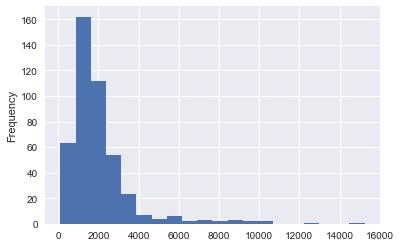

In [511]:
ln_salary.plot.hist(bins=20)

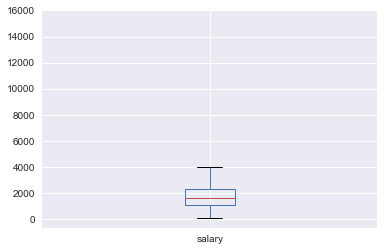

In [512]:
ln_salary.plot.box()

In [513]:
ln_salary.mean()

2027.5167785234898

In [514]:
ln_salary.median()

1600.0

## 1.2 Next we try to make a more detailed analysis of the data (no logarithm).   

-----------------------------------
1.2(a)

Sales and profits has a strong correlation. Those columns are also well correlated with assets.

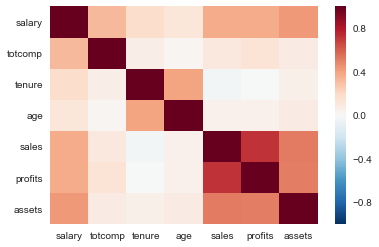

In [515]:
sns.heatmap(df.corr())

---
1.2(b)
The most pronounced linear dependence is observed in case of "profits" and "sales" columns.

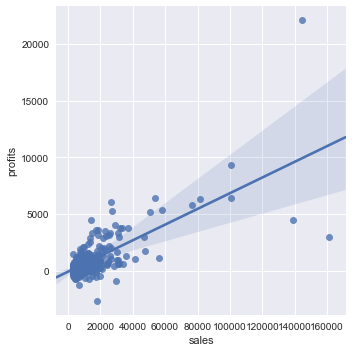

In [516]:
sns.lmplot(x='sales',y='profits',data=df,fit_reg=True) 

From Spearman correlation heatmap we also can observe dependence between "salary" and "totcomp" columns.

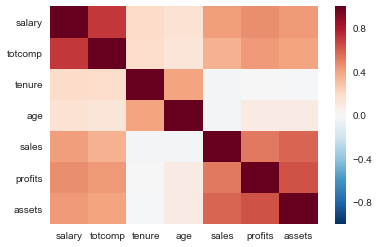

In [517]:
sns.heatmap(df.corr("spearman"))

---
1.2(c)   
There is more CEOs, who older then 50. The salaries of younger CEOs are somewhat better distributed, because fewer older CEOs get low wages.

In [518]:
is_old = df["age"] >= 50
olded_CEOs_df = df[is_old]

is_young = df["age"] < 50
younger_CEOs_df = df[is_young]

<Container object of 10 artists>

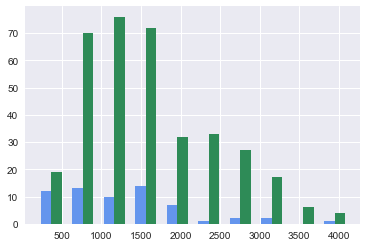

In [519]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(younger_CEOs_df['salary'])
b_heights, b_bins = np.histogram(olded_CEOs_df['salary'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

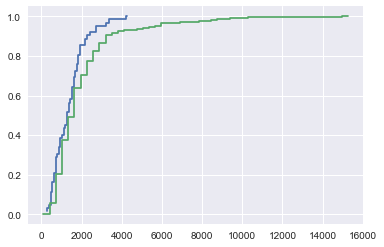

In [520]:
fig, ax = plt.subplots()

ecdf = sm.distributions.ECDF(younger_CEOs_df['salary'])

x = np.linspace(min(younger_CEOs_df['salary']), max(younger_CEOs_df['salary']))
y = ecdf(x)
plt.step(x, y)

ecdfd = sm.distributions.ECDF(olded_CEOs_df['salary'])

a = np.linspace(min(olded_CEOs_df['salary']), max(olded_CEOs_df['salary']))
b = ecdfd(a)
plt.step(a, b)
plt.show()

## 1.3 Consider another grouping of the data. Define the groups: 

---
1.3(a)

In [521]:
is_young = df["age"] < 50
is_old = df["age"] >= 50

salary1 = df["salary"] < 2000
salary2 = (df["salary"] >= 2000) & (df["salary"] < 4000)
salary3 = df["salary"] >= 4000

A1_S1 = df[(is_young) & (salary1)]["salary"].count()
A2_S1 = df[(is_old) & (salary1)]["salary"].count()

A1_S2 = df[(is_young) & (salary2)]["salary"].count()
A2_S2 = df[(is_old) & (salary2)]["salary"].count()

A1_S3 = df[(is_young) & (salary3)]["salary"].count()
A2_S3 = df[(is_old) & (salary3)]["salary"].count()

d = {'2000 and less': [A1_S1, A2_S1], 
     'from 2000 to 4000': [A1_S2, A2_S2],
     'more than 4000': [A1_S3, A2_S3],
    'total':[A1_S1+ A1_S2+A1_S3, A2_S1+A2_S2+A2_S3]}

absolute_contigency_table = pd.DataFrame(data = d, index = ["age < 50", "age >=50"])
absolute_contigency_table

,2000 and less,from 2000 to 4000,more than 4000,total
age < 50,52,9,1,62
age >=50,248,107,30,385


In [522]:
relative_frequencies = absolute_contigency_table.divide(df['sales'].count())*100
relative_frequencies

,2000 and less,from 2000 to 4000,more than 4000,total
age < 50,11.633110,2.013423,0.223714,13.870246
age >=50,55.480984,23.937360,6.711409,86.129754


---
1.3(b)

* n<sub>12</sub> = 9; 9 CEOs are younger than 50 and have salary from 2000 to 4000   
* h<sub>12</sub> = 9; 2% of CEOs are younger than 50 and have salary from 2000 to 4000   
* n<sub>1</sub> = 62; 62 CEOs are younger than 50  
* h<sub>1</sub> = 13.87; 13.87% of CEOs are younger than 50   


# Problem 2: Descriptive Statistics and Probability Theory: Simulated Data

It is obvious that the descriptive tools are very sensitive to contamination or outliers in
the data. The objective of this problem is to assess the sensitivity of these measures/tools
to outliers or very heterogenous data.

## 2.1 Simulate (with a fixed seed) a sample of size n = 50 from the normal distribution

---
2.1(a)

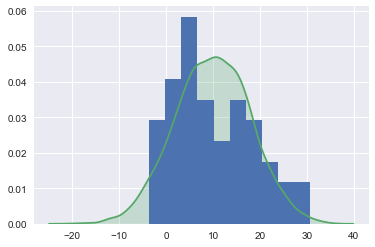

In [523]:
import scipy.stats as stats
import pylab as pl

mu, sigma = 10, 9
sample = np.random.normal(mu, sigma, 50)

h = sorted(sample) 

pl.hist(h,normed=True)  

N = np.random.normal(loc=10, scale=8, size=10000)
sns.distplot(N, hist=False, kde_kws={'shade': True})

pl.show()      

---
2.1(b)

Sample y<sub>i</sub> from t<sub>5</sub> has density close to the density of N(10; 9);

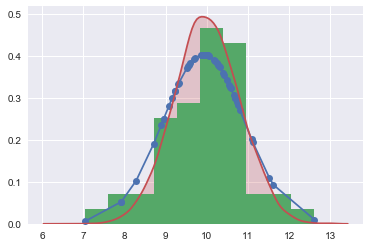

In [524]:
yi = np.random.standard_t(5, size=50)
yi = 10 + np.sqrt(3/5)*yi

h = sorted(yi) 

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)     

N = np.random.normal(loc=10, scale=0.8, size=10000)
sns.distplot(N, hist=False, kde_kws={'shade': True})

pl.show()   

## 2.2 In practice the data is always very heterogenous. To reflect it we contaminate the data by adding an outlier or a subsample with different characteristics.

---
2.2(a)

In [525]:
outlier = [];
for i in range(0, 50):
    outlier.append(16 + i * (24 - 16)/49)
    
distorted_sample = np.append(sample, outlier)

sample = pd.Series(sample)
distorted_sample = pd.Series(distorted_sample)

mean = sample.mean()
d_mean = distorted_sample.mean()

median = sample.median()
d_median = distorted_sample.median()

variance = sample.var()
d_variance = distorted_sample.var()

d = {'mean': [mean, d_mean], 
     'median': [median, d_median],
     'variance': [variance, d_variance]}

distortion_df = pd.DataFrame(data = d, index = ["sample", "sample + outlier"])
distortion_df

,mean,median,variance
sample,10.277674,8.336334,75.543036
sample + outlier,15.138837,17.714286,64.063136


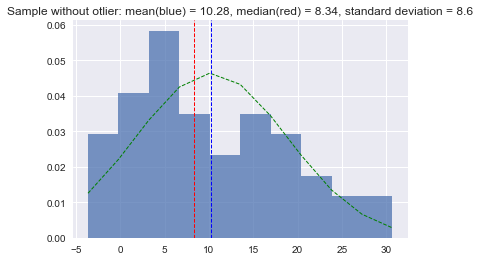

In [526]:
(mu, sigma) = stats.norm.fit(sample)

n, bins, patches = plt.hist(sample, 10, normed=1, alpha=0.75)

y = mpl.mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'g--', linewidth=1)

plt.title('Sample without otlier: mean(blue) = {0}, median(red) = {1}, standard deviation = {2}'.format(round(mu,2), round(median,2), round(sigma,2)))
plt.grid(True)
plt.axvline(mean, color='b', linestyle='dashed', linewidth=1)
plt.axvline(median, color='r', linestyle='dashed', linewidth=1)
plt.show()

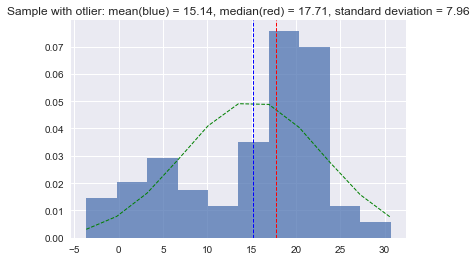

In [527]:
(mu, sigma) = stats.norm.fit(distorted_sample)

n, bins, patches = plt.hist(distorted_sample, 10, normed=1, alpha=0.75)

y = mpl.mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'g--', linewidth=1)

plt.title('Sample with otlier: mean(blue) = {0}, median(red) = {1}, standard deviation = {2}'.format(round(mu,2), round(d_median,2), round(sigma,2)))
plt.grid(True)
plt.axvline(d_mean, color='b', linestyle='dashed', linewidth=1)
plt.axvline(d_median, color='r', linestyle='dashed', linewidth=1)
plt.show()

---
2.2(b)

In [528]:
mu, sigma = 20, 4 
sample_s = pd.Series(np.random.normal(mu, sigma, 10))
sample_m = pd.Series(np.random.normal(mu, sigma, 55))
sample_l = pd.Series(np.random.normal(mu, sigma, 100))

In [657]:
heterogenous_sample_s = sample.append(sample_s)
heterogenous_sample_m = sample.append(sample_m)
heterogenous_sample_l = sample.append(sample_l)

---
2.2(c)

Sample of size 10 simulated from N(20; 2<sup>2</sup>)

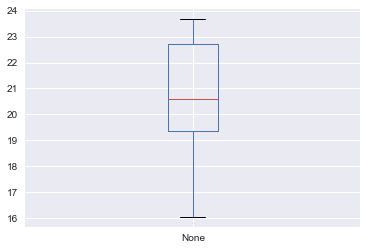

In [530]:
sample_s.plot(kind="box")

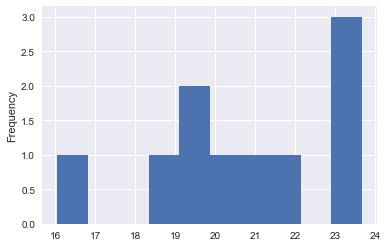

In [654]:
sample_s.plot(kind="hist")

Sample of size 55 simulated from N(20; 2<sup>2</sup>)

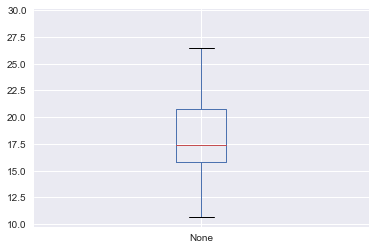

In [532]:
sample_m.plot(kind="box")

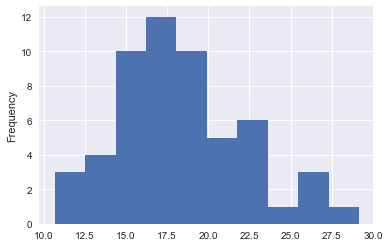

In [656]:
sample_m.plot(kind="hist")

Sample of size 100 simulated from N(20; 2<sup>2</sup>)

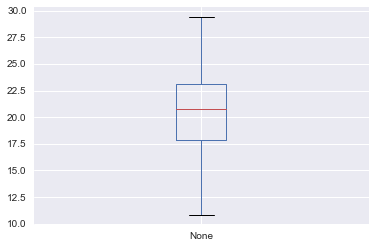

In [534]:
sample_l.plot(kind="box")

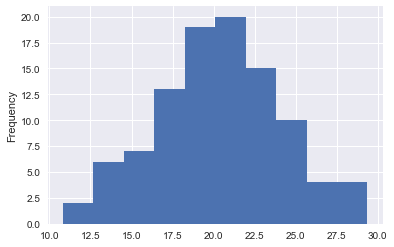

In [658]:
sample_l.plot(kind="hist")

Original sample with added sample of size 10.

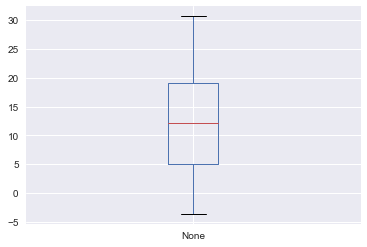

In [536]:
heterogenous_sample_s.plot(kind="box")

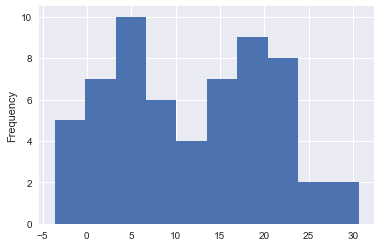

In [659]:
heterogenous_sample_s.plot(kind="hist")

Original sample with added sample of size 55.

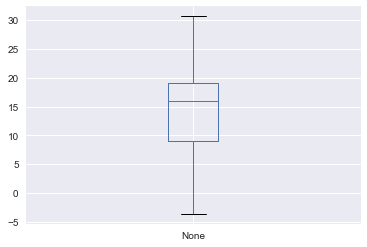

In [538]:
heterogenous_sample_m.plot(kind="box")

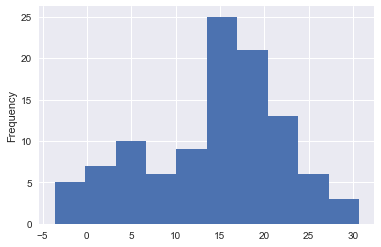

In [660]:
heterogenous_sample_m.plot(kind="hist")

Original sample with added sample of size 100.

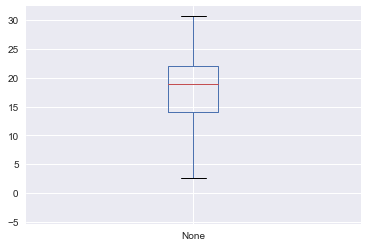

In [540]:
heterogenous_sample_l.plot(kind="box")

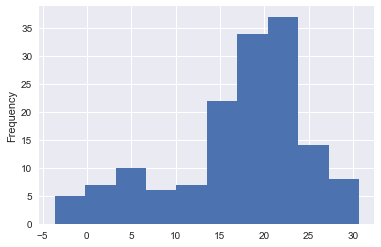

In [617]:
heterogenous_sample_l.plot(kind="hist")

## 2.3 Next step is to simulate two dependent data sets. We simulate two samples with a given value of the correlation coefficient.

---
2.3(a,b)

In [643]:
p = 0.8
mu, sigma = 0, 1 
U = np.random.normal(mu, sigma, 100)
U = pd.Series(U)

V = np.random.normal(mu, sigma, 100)
V = pd.Series(V)

U1 = U
V1 = 0.8*U+np.sqrt(1-np.power(p,2))*V

p1 = U1.corr(V1, method='pearson', min_periods=None)
p1

0.82831091378339083

In [644]:
s1 = U1.corr(V1, method='spearman', min_periods=None)
s1

0.82953495349534956

---
2.3(c)

In [645]:
V11 = np.log(V1)
p2 = U1.corr(V11, method='pearson', min_periods=None)
p2

C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


0.59119633403322713

In [646]:
s2 = U1.corr(V11, method='spearman', min_periods=None)
s2

0.6962657403386886

---

Before transformation:

In [647]:
print('Pearson: {0}, Spearman: {1}'.format(round(p1,2), round(s1,2)))

Pearson: 0.83, Spearman: 0.83


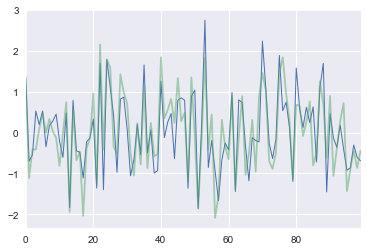

In [648]:
fig, axes = plt.subplots()

U1.plot.line(linewidth=1)
V1.plot.line(alpha=0.5)

After transformation:

In [649]:
print('Pearson: {0}, Spearman: {1}'.format(round(p2,2), round(s2,2)))

Pearson: 0.59, Spearman: 0.7


After monotonic transformation Spearman coefficient less affected.

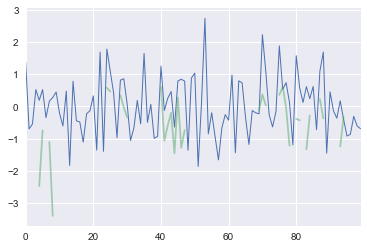

In [651]:
fig, axes = plt.subplots()
U1.plot.line(linewidth=1)
V11.plot.line(alpha=0.5)